##ODI Cricket Players Clustering using K-Means

Overview
This project applies K-Means Clustering to group ODI cricket players based on their career statistics.
It helps identify player types, compare performances, and analyze patterns in ODI batting data.

Author: Kritika Kamboj


In [ ]:
#Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
#Load the dataset
df=pd.read_csv('/content/Cricket.csv',encoding='latin1')
df

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,CG Greenidge (WI),1975-1991,128,127,13,5134,133*,45.03,7908,64.92,11,31,3
75,Misbah-ul-Haq (PAK),2002-2015,162,149,31,5122,96*,43.40,6945,73.75,0,42,6
76,PD Collingwood (ENG),2001-2011,197,181,37,5092,120*,35.36,6614,76.98,5,26,7
77,A Symonds (AUS),1998-2009,198,161,33,5088,156,39.75,5504,92.44,6,30,15


#EDA



##Data Quality Checks
We check for:
- Missing values
- Duplicate entries
- Data types


In [ ]:
#Check missing values
df.isnull().sum()

,0
Player,0
Span,0
Mat,0
Inns,0
NO,0
Runs,0
HS,0
Ave,0
BF,0
SR,0


In [ ]:
#Check for duplicate entries
df.duplicated().sum()

np.int64(0)

In [ ]:
#Check for datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  79 non-null     object 
 1   Span    79 non-null     object 
 2   Mat     79 non-null     int64  
 3   Inns    79 non-null     int64  
 4   NO      79 non-null     int64  
 5   Runs    79 non-null     int64  
 6   HS      79 non-null     object 
 7   Ave     79 non-null     float64
 8   BF      79 non-null     int64  
 9   SR      79 non-null     float64
 10  100     79 non-null     int64  
 11  50      79 non-null     int64  
 12  0       79 non-null     int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 8.2+ KB


##Data Cleaning
We clean the dataset by:
- Removing special characters from 'HS'
- Converting data to appropriate numeric formats
- Splitting the 'Span' column into Start and End years


In [ ]:
df['HS']=df['HS'].str.replace('*','')
df['HS']

,HS
0,200
1,169
2,164
3,189
4,144
...,...
74,133
75,96
76,120
77,156


In [ ]:
df['HS']=pd.to_numeric(df['HS'])
df['HS']

,HS
0,200
1,169
2,164
3,189
4,144
...,...
74,133
75,96
76,120
77,156


In [ ]:
df['Start']=df['Span'].str.split('-').str[0]
df['End']=df['Span'].str.split('-').str[1]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  79 non-null     object 
 1   Span    79 non-null     object 
 2   Mat     79 non-null     int64  
 3   Inns    79 non-null     int64  
 4   NO      79 non-null     int64  
 5   Runs    79 non-null     int64  
 6   HS      79 non-null     int64  
 7   Ave     79 non-null     float64
 8   BF      79 non-null     int64  
 9   SR      79 non-null     float64
 10  100     79 non-null     int64  
 11  50      79 non-null     int64  
 12  0       79 non-null     int64  
 13  Start   79 non-null     object 
 14  End     79 non-null     object 
dtypes: float64(2), int64(9), object(4)
memory usage: 9.4+ KB


In [ ]:
df['Start']=pd.to_numeric(df['Start'])
df['End']=df['End'].astype('int')

In [ ]:
#Create new columns
df['Exp']=df['End']-df['Start']
df

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Start,End,Exp
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200,44.83,21367,86.23,49,96,20,1989,2012,23
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15,2000,2015,15
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20,1995,2012,17
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34,1989,2011,22
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28,1998,2015,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,CG Greenidge (WI),1975-1991,128,127,13,5134,133,45.03,7908,64.92,11,31,3,1975,1991,16
75,Misbah-ul-Haq (PAK),2002-2015,162,149,31,5122,96,43.40,6945,73.75,0,42,6,2002,2015,13
76,PD Collingwood (ENG),2001-2011,197,181,37,5092,120,35.36,6614,76.98,5,26,7,2001,2011,10
77,A Symonds (AUS),1998-2009,198,161,33,5088,156,39.75,5504,92.44,6,30,15,1998,2009,11


In [ ]:
#Drop extra columns
df.drop(['Start','End','Span'],axis=1,inplace=True)


In [ ]:
df

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp
0,SR Tendulkar (INDIA),463,452,41,18426,200,44.83,21367,86.23,49,96,20,23
1,KC Sangakkara (Asia/ICC/SL),404,380,41,14234,169,41.98,18048,78.86,25,93,15,15
2,RT Ponting (AUS/ICC),375,365,39,13704,164,42.03,17046,80.39,30,82,20,17
3,ST Jayasuriya (Asia/SL),445,433,18,13430,189,32.36,14725,91.20,28,68,34,22
4,DPMD Jayawardene (Asia/SL),448,418,39,12650,144,33.37,16020,78.96,19,77,28,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,CG Greenidge (WI),128,127,13,5134,133,45.03,7908,64.92,11,31,3,16
75,Misbah-ul-Haq (PAK),162,149,31,5122,96,43.40,6945,73.75,0,42,6,13
76,PD Collingwood (ENG),197,181,37,5092,120,35.36,6614,76.98,5,26,7,10
77,A Symonds (AUS),198,161,33,5088,156,39.75,5504,92.44,6,30,15,11


##Descriptive statistics

In [ ]:
df.describe()

,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp
count,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000
mean,245.075949,230.544304,30.037975,7618.139241,149.253165,38.523291,9684.455696,79.295316,11.556962,46.443038,13.253165,13.746835
std,74.211716,70.321022,14.421710,2551.873313,31.285070,5.919093,3193.835825,9.925307,8.092014,16.351701,5.925755,3.310699
min,128.000000,127.000000,4.000000,5080.000000,96.000000,23.570000,5504.000000,60.570000,0.000000,23.000000,3.000000,8.000000
25%,188.000000,177.000000,17.500000,5759.000000,125.500000,34.600000,7393.500000,73.725000,6.000000,34.500000,9.000000,11.000000
50%,232.000000,217.000000,29.000000,6798.000000,144.000000,37.870000,9134.000000,77.730000,10.000000,42.000000,13.000000,14.000000
75%,281.500000,261.500000,40.000000,8739.500000,167.500000,41.845000,10976.000000,85.180000,15.500000,54.000000,16.000000,16.000000
max,463.000000,452.000000,70.000000,18426.000000,264.000000,53.940000,21367.000000,117.000000,49.000000,96.000000,34.000000,23.000000


## Outlier Detection using Boxplots

We will visualize numerical features to identify potential outliers using multiple visualization libraries.  
### 1. Matplotlib — Quick and Basic Boxplots  
Matplotlib provides a simple way to check for outliers column by column.


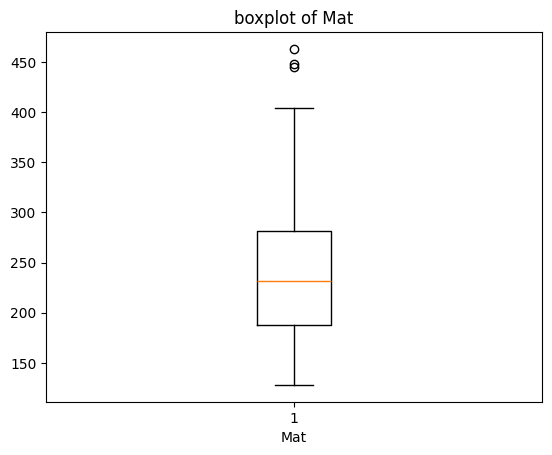

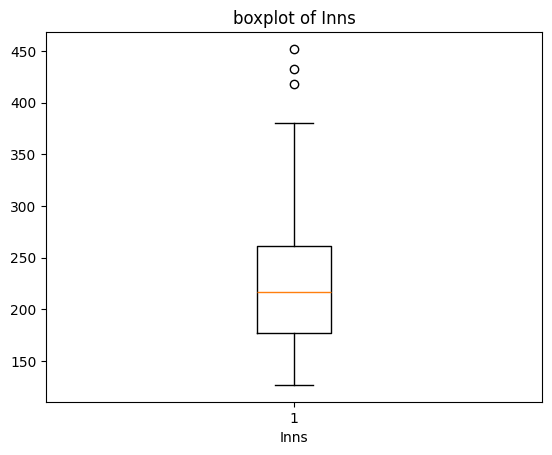

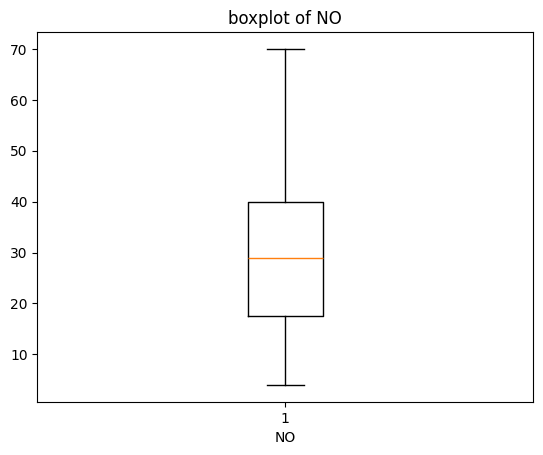

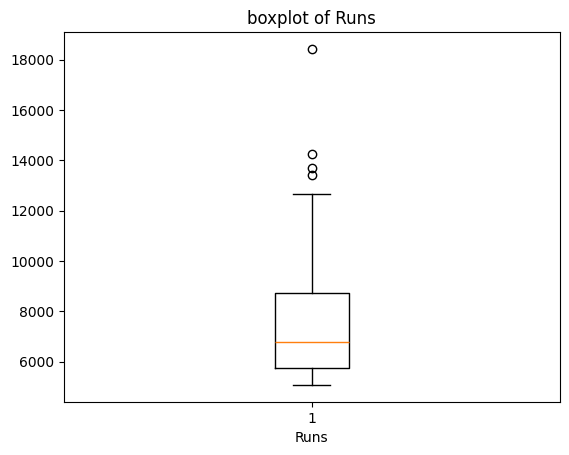

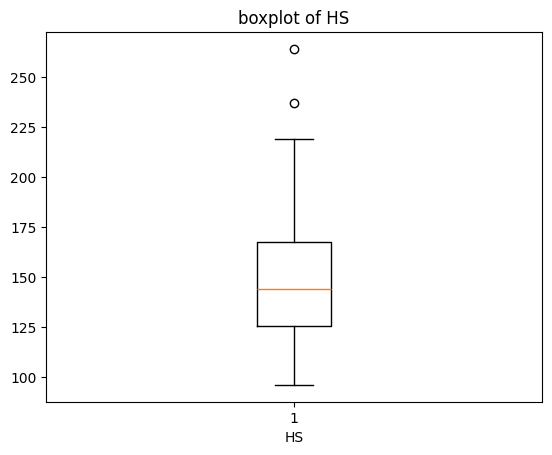

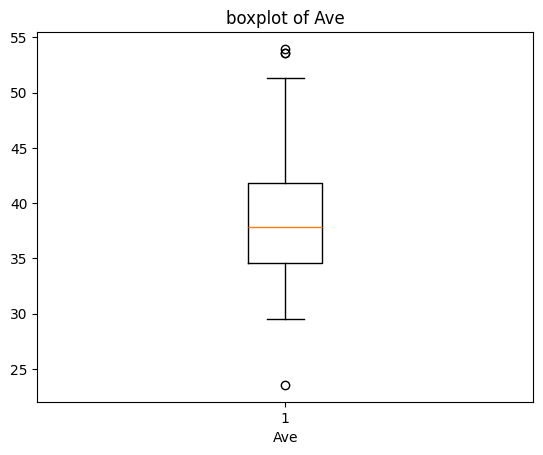

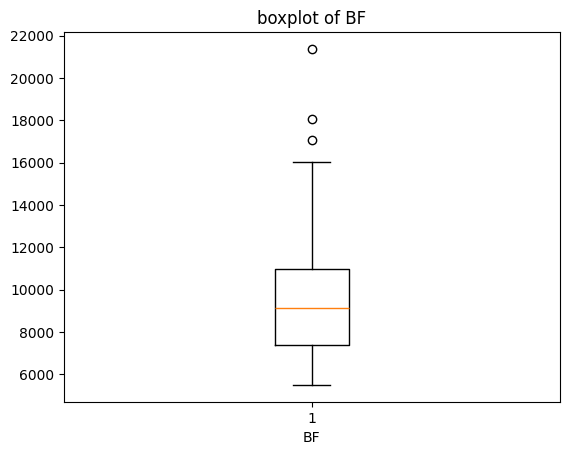

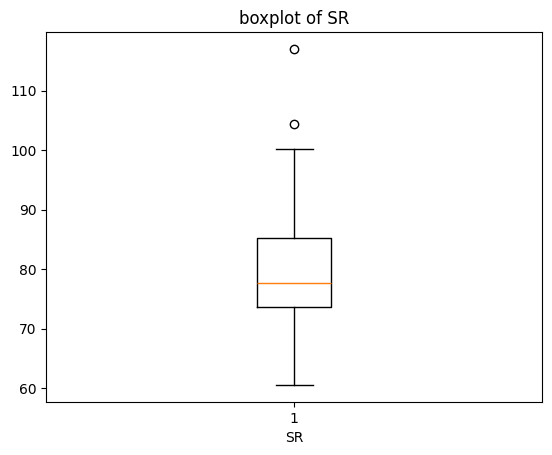

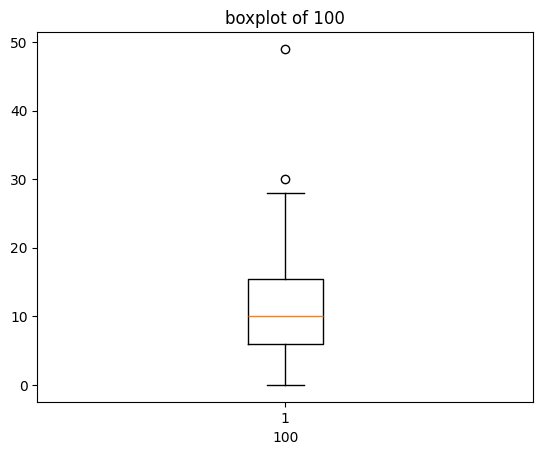

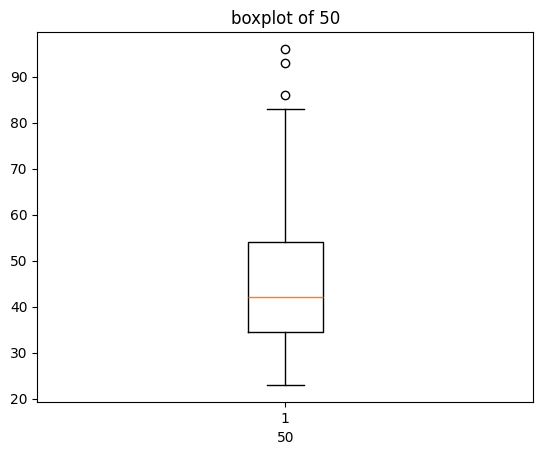

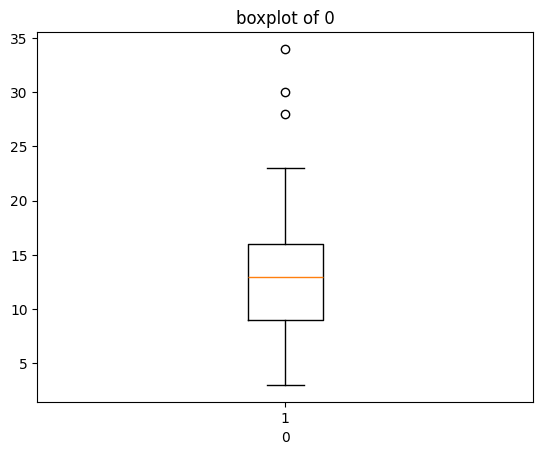

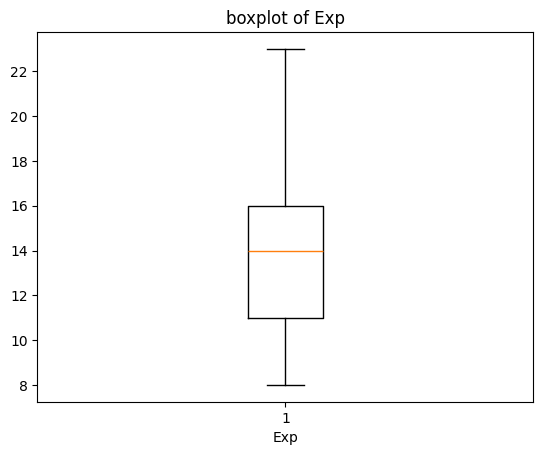

In [ ]:
for col in df.columns:
  if df[col].dtype!='object':
    plt.boxplot(df[col])
    plt.xlabel(col)
    plt.title(f'boxplot of {(col)}')
    plt.show()

### 2. Seaborn — Enhanced Boxplots with Better Styling


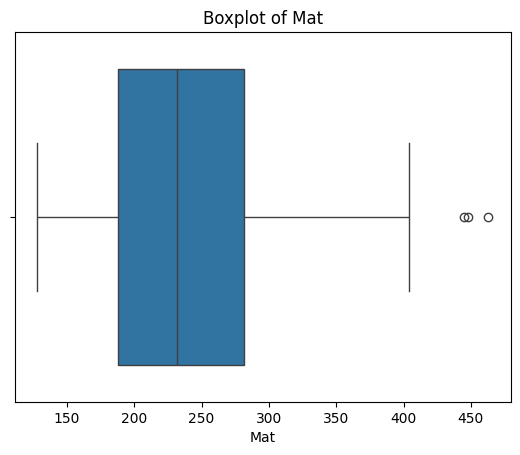

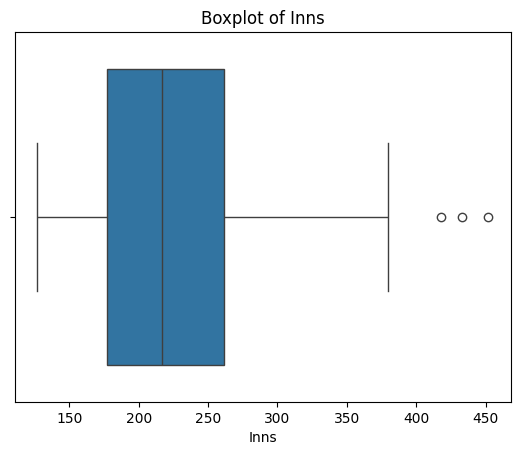

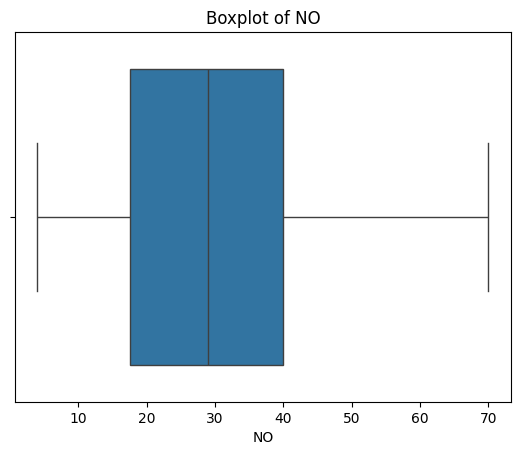

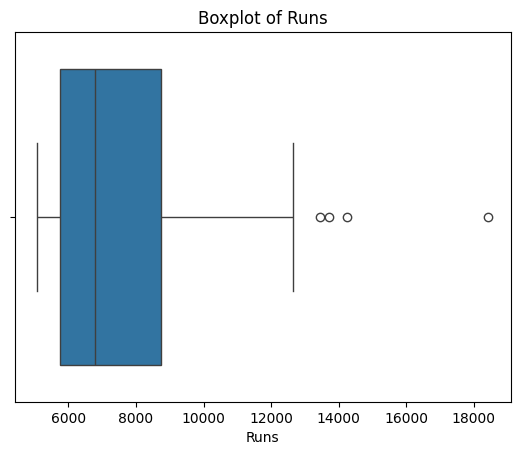

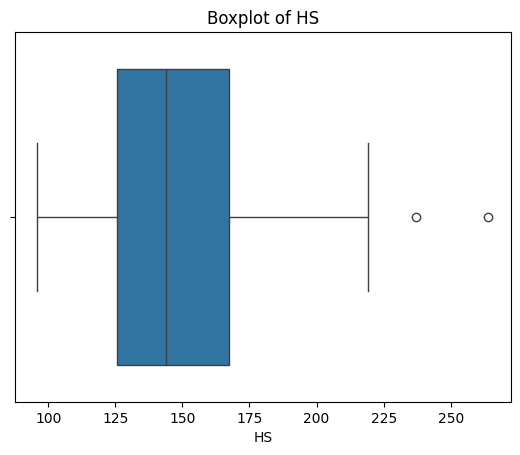

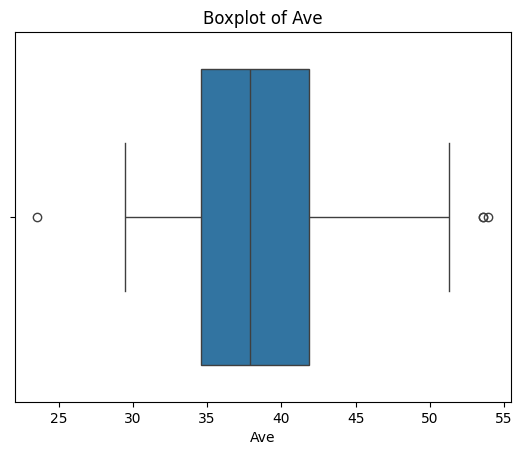

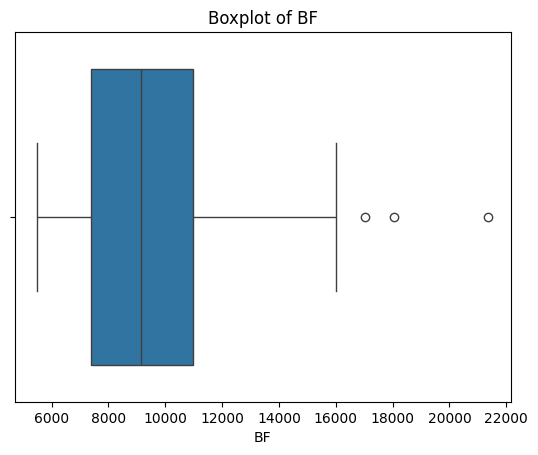

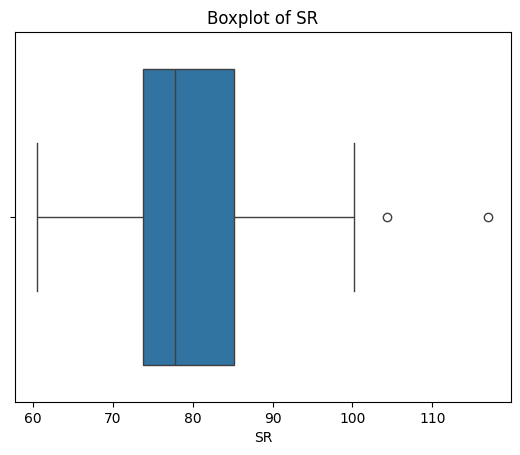

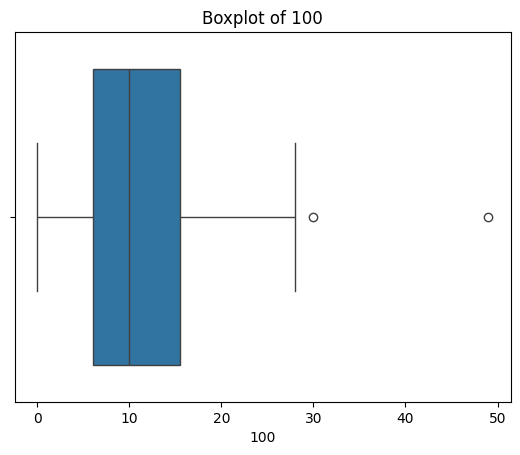

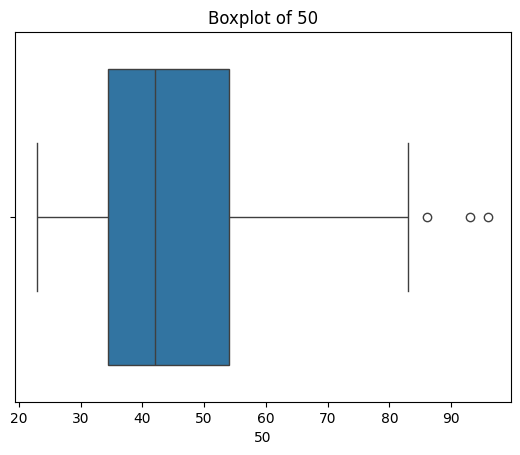

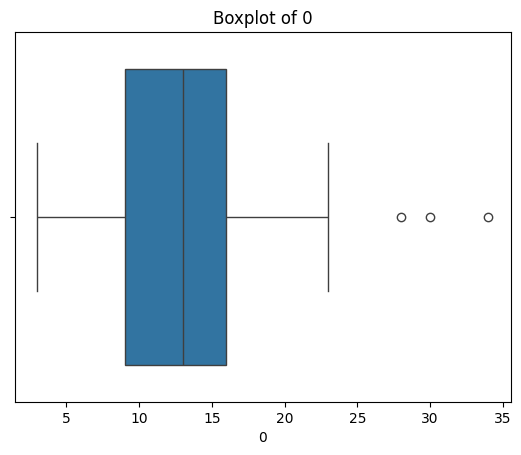

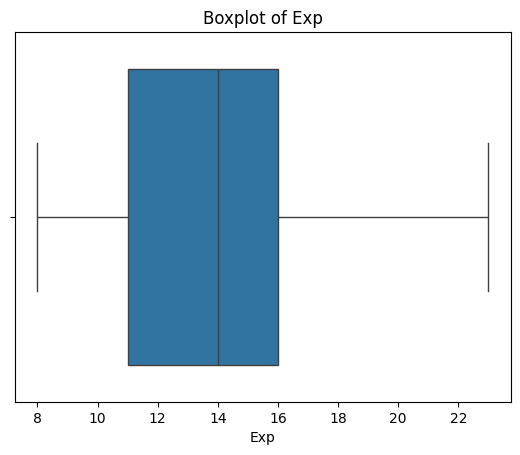

In [ ]:
for col in df.columns:
    if df[col].dtype != 'object':
        sns.boxplot(x=df[col])
        plt.xlabel(col)
        plt.title(f'Boxplot of {col}')
        plt.show()

### 3. Plotly — Interactive Boxplots for Dynamic Outlier Exploration


In [ ]:
for col in df.columns:
  if df[col].dtype!='object':
   fig=px.box(df,y=col,title=f'boxplot of {col}')
   fig.update_layout(width=500,height=500)
   fig.show()

### Creating a Copy of the Dataset

We create a copy of the original dataframe to ensure that any data cleaning or transformations do not modify the raw dataset


In [ ]:
df_copy=df.copy()

In [ ]:
#drop object column
df_copy.drop(['Player'],inplace=True,axis=1)

In [ ]:
df_copy

,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp
0,463,452,41,18426,200,44.83,21367,86.23,49,96,20,23
1,404,380,41,14234,169,41.98,18048,78.86,25,93,15,15
2,375,365,39,13704,164,42.03,17046,80.39,30,82,20,17
3,445,433,18,13430,189,32.36,14725,91.20,28,68,34,22
4,448,418,39,12650,144,33.37,16020,78.96,19,77,28,17
...,...,...,...,...,...,...,...,...,...,...,...,...
74,128,127,13,5134,133,45.03,7908,64.92,11,31,3,16
75,162,149,31,5122,96,43.40,6945,73.75,0,42,6,13
76,197,181,37,5092,120,35.36,6614,76.98,5,26,7,10
77,198,161,33,5088,156,39.75,5504,92.44,6,30,15,11


In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Mat     79 non-null     int64  
 1   Inns    79 non-null     int64  
 2   NO      79 non-null     int64  
 3   Runs    79 non-null     int64  
 4   HS      79 non-null     int64  
 5   Ave     79 non-null     float64
 6   BF      79 non-null     int64  
 7   SR      79 non-null     float64
 8   100     79 non-null     int64  
 9   50      79 non-null     int64  
 10  0       79 non-null     int64  
 11  Exp     79 non-null     int64  
dtypes: float64(2), int64(10)
memory usage: 7.5 KB


## Data Scaling (Standardization)
K-Means uses distance-based calculations, so scaling ensures
all numerical features contribute equally to the clustering


In [ ]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler

In [ ]:
# Initialize the StandardScaler
sc=StandardScaler()

# Fit and transform only the numerical columns
df_scaled=sc.fit_transform(df_copy)

# Convert scaled array back to DataFrame
df_scaled=pd.DataFrame(df_scaled,columns=df_copy.columns)

# Preview scaled data
df_scaled

,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp
0,2.955282,3.169333,0.764963,4.262328,1.632443,1.072294,3.681214,0.703152,4.656726,3.050057,1.145837,2.812787
1,2.155179,2.138915,0.764963,2.609117,0.635224,0.587725,2.635385,-0.044139,1.671888,2.865418,0.296671,0.380938
2,1.761908,1.924245,0.625397,2.400099,0.474382,0.596226,2.319651,0.110997,2.293729,2.188406,1.145837,0.988900
3,2.711183,2.897417,-0.840046,2.292041,1.278591,-1.047909,1.588295,1.207091,2.044992,1.326755,3.523501,2.508806
4,2.751866,2.682747,0.625397,1.984430,-0.168986,-0.876185,1.996354,-0.034000,0.925678,1.880674,2.504502,0.988900
...,...,...,...,...,...,...,...,...,...,...,...,...
74,-1.587674,-1.481860,-1.188961,-0.979677,-0.522838,1.106299,-0.559768,-1.457604,-0.069268,-0.950465,-1.741328,0.684919
75,-1.126598,-1.167010,0.067133,-0.984410,-1.713068,0.829159,-0.863213,-0.562275,-1.437319,-0.273453,-1.231828,-0.227024
76,-0.651961,-0.709047,0.485831,-0.996241,-0.941027,-0.537836,-0.967512,-0.234765,-0.815478,-1.258197,-1.061995,-1.138967
77,-0.638400,-0.995274,0.206699,-0.997819,0.217035,0.208570,-1.317278,1.332823,-0.691110,-1.012011,0.296671,-0.834986


##Finding the Optimal Number of Clusters – Elbow Method

We iterate over different values of k (2 to 7) and fit a K-Means model for each.
For every model, we record the Within-Cluster Sum of Squares (WCSS), also called inertia, which measures how tightly the points are grouped in each cluster.

The WCSS values will later be plotted against `k` to identify the "elbow point" — the point where increasing the number of clusters results in minimal reduction in WCSS, indicating an optimal `k`.


In [ ]:
from sklearn.cluster import KMeans

In [ ]:
k_values=[2,3,4,5,6,7]

inertia=[]
for x in k_values:
  kmodel=KMeans(n_clusters=x, random_state=0,max_iter=150,n_init=10)
  kmodel.fit(df_scaled)
  inertia.append(kmodel.inertia_)
inertia

[644.8298268927057,
 531.4535214769,
 462.59719099146156,
 423.3168214688501,
 382.20335384815724,
 337.07429493752664]

###Elbow method plot


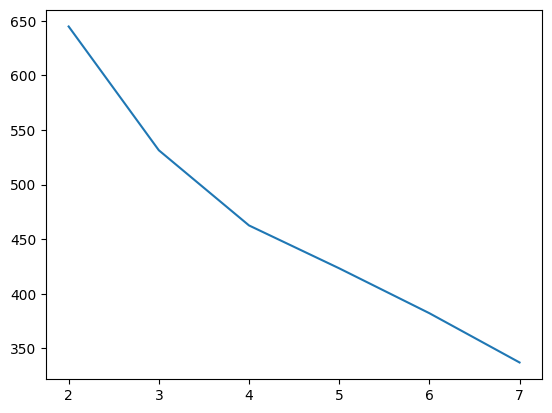

In [ ]:
plt.plot(k_values,inertia)

###Apply K-Means with k=4 (chosen from Elbow Method)
####Groups players into 4 performance-based clusters

In [ ]:
kmodel=KMeans(n_clusters=4,random_state=0,max_iter=150)
kmodel.fit(df_scaled)

KMeans(max_iter=150, n_clusters=4, random_state=0)

####View cluster label assigned to each data point


In [ ]:
kmodel.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 3, 3, 1, 3, 0, 1, 0,
       0, 0, 3, 3, 3, 1, 0, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 1, 3, 1,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int32)

####Assign Cluster Labels to Each Player



In [ ]:
df['clusters']=kmodel.labels_

# Preview the dataset with cluster labels
df

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp,clusters
0,SR Tendulkar (INDIA),463,452,41,18426,200,44.83,21367,86.23,49,96,20,23,2
1,KC Sangakkara (Asia/ICC/SL),404,380,41,14234,169,41.98,18048,78.86,25,93,15,15,2
2,RT Ponting (AUS/ICC),375,365,39,13704,164,42.03,17046,80.39,30,82,20,17,2
3,ST Jayasuriya (Asia/SL),445,433,18,13430,189,32.36,14725,91.20,28,68,34,22,2
4,DPMD Jayawardene (Asia/SL),448,418,39,12650,144,33.37,16020,78.96,19,77,28,17,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,CG Greenidge (WI),128,127,13,5134,133,45.03,7908,64.92,11,31,3,16,3
75,Misbah-ul-Haq (PAK),162,149,31,5122,96,43.40,6945,73.75,0,42,6,13,3
76,PD Collingwood (ENG),197,181,37,5092,120,35.36,6614,76.98,5,26,7,10,3
77,A Symonds (AUS),198,161,33,5088,156,39.75,5504,92.44,6,30,15,11,3


In [ ]:
#See all rows in cluster 0
df[df['clusters']==0]

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp,clusters
9,BC Lara (ICC/WI),299,289,32,10405,169,40.48,13086,79.51,19,63,16,17,0
10,TM Dilshan (SL),330,303,41,10290,161,39.27,11933,86.23,22,47,11,17,0
11,Mohammad Yousuf (Asia/PAK),288,273,40,9720,141,41.71,12942,75.10,15,64,15,12,0
12,AC Gilchrist (AUS/ICC),287,279,11,9619,172,35.89,9922,96.94,16,55,19,12,0
13,MS Dhoni (Asia/INDIA),295,255,70,9496,183,51.32,10706,88.69,10,64,8,13,0
14,M Azharuddin (INDIA),334,308,54,9378,153,36.92,12669,74.02,7,58,9,15,0
16,PA de Silva (SL),308,296,30,9284,145,34.90,11443,81.13,11,64,17,19,0
17,CH Gayle (ICC/WI),269,264,17,9221,215,37.33,10834,85.11,22,47,23,16,0
18,Saeed Anwar (PAK),247,244,19,8824,194,39.21,10938,80.67,20,43,15,14,0
19,S Chanderpaul (WI),268,251,40,8778,150,41.60,12408,70.74,11,59,6,17,0


In [ ]:
#See all rows in cluster 1
df[df['clusters']==1]

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp,clusters
15,AB de Villiers (Afr/SA),222,213,39,9319,162,53.55,9295,100.25,24,53,7,12,1
24,V Sehwag (Asia/ICC/INDIA),251,245,9,8273,219,35.05,7929,104.33,15,38,14,14,1
25,V Kohli (INDIA),188,180,29,8146,183,53.94,8952,90.99,27,43,11,9,1
34,HM Amla (SA),156,153,10,7186,159,50.25,8069,89.05,25,33,3,9,1
39,G Kirsten (SA),185,185,19,6798,188,40.95,9436,72.04,13,45,11,10,1
42,IVA Richards (WI),187,167,24,6721,189,47.00,7451,90.20,11,45,7,16,1
49,ML Hayden (AUS/ICC),161,155,15,6133,181,43.80,7767,78.96,10,36,9,15,1
59,SR Watson (AUS),190,169,27,5757,185,40.54,6365,90.44,9,33,12,13,1
63,MJ Guptill (NZ),146,143,16,5500,237,43.30,6269,87.73,12,32,12,8,1
65,RG Sharma (INDIA),158,152,24,5435,264,42.46,6427,84.56,11,31,11,10,1


In [ ]:
#See all rows in cluster 2
df[df['clusters']==2]

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp,clusters
0,SR Tendulkar (INDIA),463,452,41,18426,200,44.83,21367,86.23,49,96,20,23,2
1,KC Sangakkara (Asia/ICC/SL),404,380,41,14234,169,41.98,18048,78.86,25,93,15,15,2
2,RT Ponting (AUS/ICC),375,365,39,13704,164,42.03,17046,80.39,30,82,20,17,2
3,ST Jayasuriya (Asia/SL),445,433,18,13430,189,32.36,14725,91.20,28,68,34,22,2
4,DPMD Jayawardene (Asia/SL),448,418,39,12650,144,33.37,16020,78.96,19,77,28,17,2
5,Inzamam-ul-Haq (Asia/PAK),378,350,53,11739,137,39.52,15812,74.24,10,83,20,16,2
6,JH Kallis (Afr/ICC/SA),328,314,53,11579,139,44.36,15885,72.89,17,86,17,18,2
7,SC Ganguly (Asia/INDIA),311,300,23,11363,183,41.02,15416,73.70,22,72,16,15,2
8,R Dravid (Asia/ICC/INDIA),344,318,40,10889,153,39.16,15284,71.24,12,83,13,15,2


#### View Cluster Size Distribution


In [ ]:
df['clusters'].value_counts()

,count
clusters,
3,31
0,29
1,10
2,9


### Visualizing player clusters: Runs vs Batting Average
#### Each color represents a different cluster from K-Means

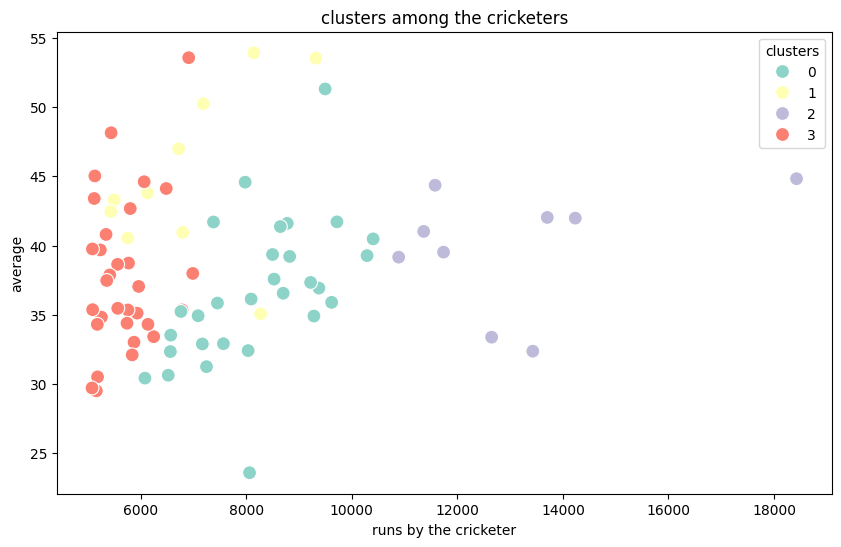

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x='Runs',y='Ave',hue='clusters',s=100,palette='Set3')
plt.title('clusters among the cricketers')
plt.xlabel('runs by the cricketer')
plt.ylabel('average')
plt.show()

####3D scatter plot of Runs, Average, and Strike Rate colored by cluster
#### Interactive view with player names shown on hover

In [ ]:

fig=px.scatter_3d(df,x="Runs",y="Ave",z='SR',color='clusters',hover_name='Player',title='3D Scatter Plot')
fig.show()

## Observations on Player Clusters
Cluster 0 : Consistent anchors: Moderate strike rates, reliable run accumulation

Cluster 1 : Aggressive hitters: High strike rates, may have lower averages

Cluster 2 : Legendary all-round performers: High runs, balanced averages, match-winners

Cluster 3 : Supporting role players: Good averages, moderate strike rates, stable contributors.
